In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/NewDriveD/COding/Alok_mastor/Alok-Mastor/Dataset/parkinsons_updrs.csv")
# data.head()

In [3]:
# Check for NaN values
nan_values = data.isna().sum()
# print(nan_values)

# Correct NaN values by filling them with appropriate values
# data.fillna(value, inplace=True)


In [4]:
skewness = data.skew()
# print(skewness)


In [5]:
import pandas as pd
import numpy as np

# Assuming 'data' is the DataFrame containing your dataset
column_names = list(data.columns)

outliers = []
for col_name in column_names:
    # Calculate the IQR for the column
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the outliers in the column
    column_outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    outliers.append(column_outliers)

# Print the outliers for each column
# for i, col_name in enumerate(column_names):
#     print(f"Outliers in column '{col_name}':")
#     print(outliers[i])
#     print()


In [6]:

column_names = list(data.columns)
column_names = column_names[:-1]

skewedCols = []
for names in column_names:
    skewVal = data[names].skew()
    if(skewVal>1 or skewVal<-1):
        skewedCols.append(names)
# print(skewedCols)
# print(len(skewedCols))

#   Name of the cols containing atleast one negative value
skewedCols_NegativeVals = []
for col_name in skewedCols:
    for values in data[col_name]:
        if(values < 0):
            skewedCols_NegativeVals.append(col_name)
            break
# print(len(skewedCols_NegativeVals))

#   Name of the cols containing atleast one zero values
skewedCols_ZeroVals = []
for col_name in skewedCols:
    if col_name in skewedCols_NegativeVals:
        continue
    else:
        for values in data[col_name]:
            if(values == 0):
                skewedCols_ZeroVals.append(col_name)
                break
# print(len(skewedCols_ZeroVals))

#   Name of the cols containing only positive values
skewedCols_PositiveVals = []
for col_name in skewedCols:
    if (col_name not in skewedCols_NegativeVals and col_name not in skewedCols_ZeroVals):
        skewedCols_PositiveVals.append(col_name)
# print(len(skewedCols_PositiveVals))

#   Box-Cox Transformation
for col_name in skewedCols_PositiveVals:
    data[col_name] = stats.boxcox(data[col_name],lmbda=0)

count = 0
for col_name in skewedCols_PositiveVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

#   CubeRoot Transformation on skewedCols_NegativeVals & skewedCols_ZeroVals
for col_name in skewedCols_NegativeVals:
    data[col_name] = np.cbrt(data[col_name])
for col_name in skewedCols_ZeroVals:
    data[col_name] = np.cbrt(data[col_name])

count = 0
for col_name in skewedCols_NegativeVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

import statistics
for col_name in column_names:
    qi = data[col_name].quantile(0.25)
    qf = data[col_name].quantile(0.75)

    iqr = qf - qi
    c = 1.5
    upper_limit=qf+c*iqr
    lower_limit=qi-c*iqr

    col_median = statistics.mean(data[col_name].to_numpy())
    for val in data[col_name]:
        if val < lower_limit or val > upper_limit:
            data[col_name] = data[col_name].replace(val,col_median)


In [8]:
# data['severity'] = data['motor_UPDRS'].apply(lambda x: 0 if 0 < x < 20 else 1)

In [9]:
# Y1 = data['severity']
# # Y2 = data['motor_UPDRS']
# X1 = data.drop(['subject#', 'motor_UPDRS', 'age','sex','test_time','severity'], axis=1)
# X2 = data.drop(['subject#', 'total_UPDRS', 'age','sex','test_time','severity'], axis=1)
# print(X2.shape)
# print(Y1.shape)

(5875, 17)
(5875,)


In [7]:
Y2=data['total_UPDRS']
X2=data.drop(['subject#', 'total_UPDRS', 'age','sex','test_time'], axis=1)
print(X2.shape)
print(Y2.shape)

(5875, 17)
(5875,)


<h1>PyTorch regression model

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size, h1, h2, h3, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x= self.fc4(x)
        x = self.relu(x)
        return x

# Split the data into training and testing sets
X_train, X_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y2_train_tensor = torch.tensor(Y2_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y2_test_tensor = torch.tensor(Y2_test.values, dtype=torch.float32)

# Define the hyperparameters
input_size = X_train.shape[1]
# hidden_size = 10
h1=10
h2=20
h3=10
output_size = 1
learning_rate = 0.001
num_epochs = 9000

# Create an instance of the regression model
model = RegressionModel(input_size, h1,h2,h3, output_size)

# Define the loss function and optimizer
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_model = None
best_epoch = -1
best_loss = float('inf')

# Before the training loop
Y2_train_tensor = Y2_train_tensor.view(-1, 1)

errors = []
accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y2_train_tensor)

     # Compute R2 score
    outputs_np = outputs.detach().numpy()
    targets_np = Y2_train_tensor.numpy()
    r2 = r2_score(targets_np, outputs_np)


    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Calculate error and accuracy here...
    errors.append(loss.item())
    accuracies.append(r2)
    # Check if this model is better than the previous best model
    if loss.item() < best_loss:
        best_model = model
        best_epoch = epoch
        best_loss = loss.item()
        best_r2 = r2

    
    # Print the loss for every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, R2 Score: {r2:.4f}')

# Print the metrics for the best model
print(f'Best Model, Epoch [{best_epoch+1}/{num_epochs}], Loss: {best_loss:.4f}, R2 Score: {best_r2:.4f}')

# Evaluate the best model on the testing set
model.eval()
with torch.no_grad():
    outputs_test = best_model(X_test_tensor)
    loss_test = criterion(outputs_test, Y2_test_tensor.view(-1, 1))

# Compute R2 score for the testing set
outputs_test_np = outputs_test.detach().numpy()
targets_test_np = Y2_test_tensor.numpy()
r2_test = r2_score(targets_test_np, outputs_test_np)

# Print the loss and R2 score for the testing set
print(f'Testing Loss: {loss_test.item():.4f}, Testing R2 Score: {r2_test:.4f}')


Epoch [100/9000], Loss: 4.6230, R2 Score: 0.6059
Epoch [200/9000], Loss: 2.1107, R2 Score: 0.8939
Epoch [300/9000], Loss: 2.1032, R2 Score: 0.8941
Epoch [400/9000], Loss: 2.0964, R2 Score: 0.8944
Epoch [500/9000], Loss: 2.0901, R2 Score: 0.8947
Epoch [600/9000], Loss: 2.0840, R2 Score: 0.8949
Epoch [700/9000], Loss: 2.0780, R2 Score: 0.8952
Epoch [800/9000], Loss: 2.0721, R2 Score: 0.8954
Epoch [900/9000], Loss: 2.0662, R2 Score: 0.8957
Epoch [1000/9000], Loss: 2.0603, R2 Score: 0.8960
Epoch [1100/9000], Loss: 2.0544, R2 Score: 0.8963
Epoch [1200/9000], Loss: 2.0484, R2 Score: 0.8965
Epoch [1300/9000], Loss: 2.0424, R2 Score: 0.8968
Epoch [1400/9000], Loss: 2.0363, R2 Score: 0.8971
Epoch [1500/9000], Loss: 2.0301, R2 Score: 0.8974
Epoch [1600/9000], Loss: 2.0238, R2 Score: 0.8977
Epoch [1700/9000], Loss: 2.0175, R2 Score: 0.8980
Epoch [1800/9000], Loss: 2.0112, R2 Score: 0.8983
Epoch [1900/9000], Loss: 2.0050, R2 Score: 0.8985
Epoch [2000/9000], Loss: 1.9989, R2 Score: 0.8988
Epoch [21

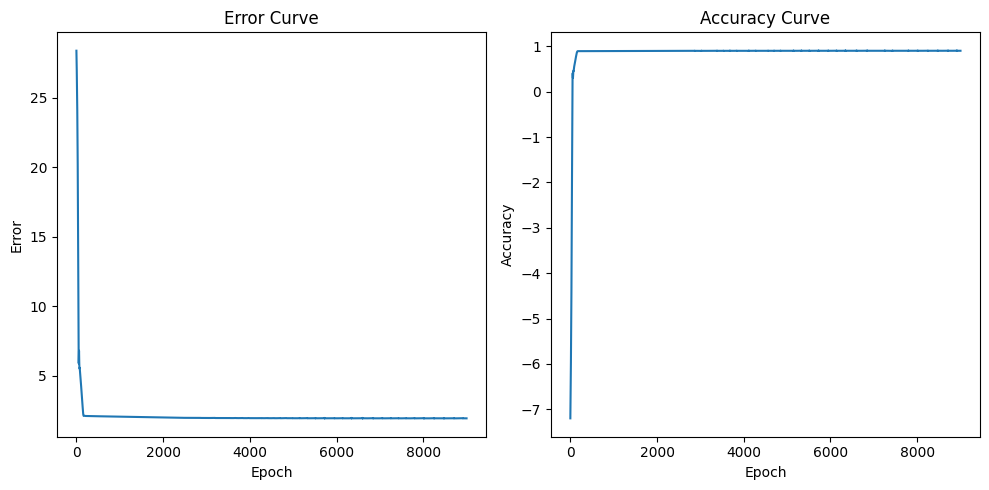

In [18]:
import matplotlib.pyplot as plt

# Plot the error curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.title('Error Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

<h3><b>Using PyTorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Define the neural network model
class ClassificationModel(nn.Module):
    def __init__(self, input_size, h1,h2,h3, output_size):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        # self.relu = nn.ReLU()
        self.fc4 = nn.Linear(h3, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # x= self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y1_train_tensor = torch.tensor(Y1_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y1_test_tensor = torch.tensor(Y1_test.values, dtype=torch.long)

# Define the hyperparameters
input_size = X_train.shape[1]
h1=10
h2=20
h3=10
output_size = 2
learning_rate = 0.001
num_epochs = 5000

# Create an instance of the classification model
model = ClassificationModel(input_size, h1,h2,h3, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_model = None
best_epoch = -1
best_loss = float('inf')
best_accuracy_train = 0
best_accuracy_test = 0

# Lists to store accuracies
training_acc = []
testing_acc = []
train_loss = []
test_loss = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss_train = criterion(outputs, Y1_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_labels_train = torch.max(outputs, 1)
    accuracy_train = (predicted_labels_train == Y1_train_tensor).sum().item() / Y1_train_tensor.size(0)

    # Evaluate on the testing set
    with torch.no_grad():
        predicted_Y1 = model(X_test_tensor)
        _, predicted_labels = torch.max(predicted_Y1, 1)
        accuracy_test = (predicted_labels == Y1_test_tensor).sum().item() / Y1_test_tensor.size(0)
        loss_test = criterion(predicted_Y1, Y1_test_tensor)

    # Check if this model is better than the previous best model
    if loss_train.item() < best_loss:
        best_model = model
        best_epoch = epoch
        best_loss = loss_train.item()
        best_accuracy_train = accuracy_train
        best_accuracy_test = accuracy_test

    # Print the loss and training and testing accuracy for every 50 epochs
    if (epoch+1) % 250 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_train.item():.4f}, Training Accuracy: {accuracy_train:.4f}, Testing Accuracy: {accuracy_test:.4f}')
        # Store accuracies
        training_acc.append(accuracy_train)
        testing_acc.append(accuracy_test)
        train_loss.append(loss_train.item())
        test_loss.append(loss_test.item())

# Print the metrics for the best model
print(f'Best Model, Epoch [{best_epoch+1}/{num_epochs}], Loss: {best_loss:.4f}, Training Accuracy: {best_accuracy_train:.4f}, Testing Accuracy: {best_accuracy_test:.4f}')

Epoch [250/5000], Loss: 0.3793, Training Accuracy: 0.9357, Testing Accuracy: 0.9201
Epoch [500/5000], Loss: 0.3685, Training Accuracy: 0.9436, Testing Accuracy: 0.9337
Epoch [750/5000], Loss: 0.3654, Training Accuracy: 0.9455, Testing Accuracy: 0.9371
Epoch [1000/5000], Loss: 0.3636, Training Accuracy: 0.9480, Testing Accuracy: 0.9354
Epoch [1250/5000], Loss: 0.3621, Training Accuracy: 0.9518, Testing Accuracy: 0.9354
Epoch [1500/5000], Loss: 0.3613, Training Accuracy: 0.9508, Testing Accuracy: 0.9388
Epoch [1750/5000], Loss: 0.3607, Training Accuracy: 0.9531, Testing Accuracy: 0.9337
Epoch [2000/5000], Loss: 0.3602, Training Accuracy: 0.9540, Testing Accuracy: 0.9354
Epoch [2250/5000], Loss: 0.3600, Training Accuracy: 0.9537, Testing Accuracy: 0.9320
Epoch [2500/5000], Loss: 0.3595, Training Accuracy: 0.9548, Testing Accuracy: 0.9320
Epoch [2750/5000], Loss: 0.3592, Training Accuracy: 0.9546, Testing Accuracy: 0.9320
Epoch [3000/5000], Loss: 0.3589, Training Accuracy: 0.9554, Testing 

<h3><b>Save the Model

In [20]:
# import joblib

# # Save the best model as a pkl file
# joblib.dump(best_model, 'best_model_motor.pkl')

['best_model_motor.pkl']

<h3><b>Acc Plot Total_UPDRS

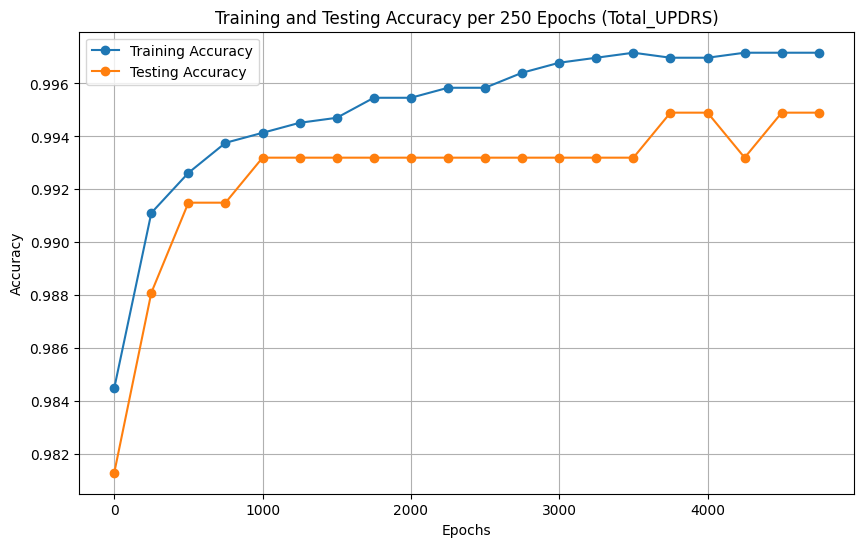

In [16]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(training_acc))], training_acc, label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(testing_acc))], testing_acc, label='Testing Accuracy', marker='o')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title
plt.title('Training and Testing Accuracy per 250 Epochs (Total_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Acc Plot Motor_UPDRS

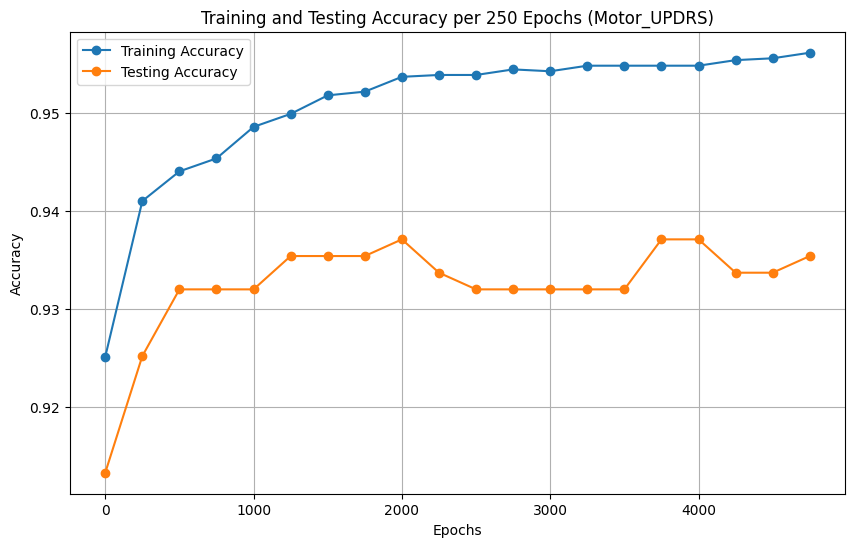

In [18]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(training_acc))], training_acc, label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(testing_acc))], testing_acc, label='Testing Accuracy', marker='o')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title
plt.title('Training and Testing Accuracy per 250 Epochs (Motor_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Error Plot Total_UPDRS

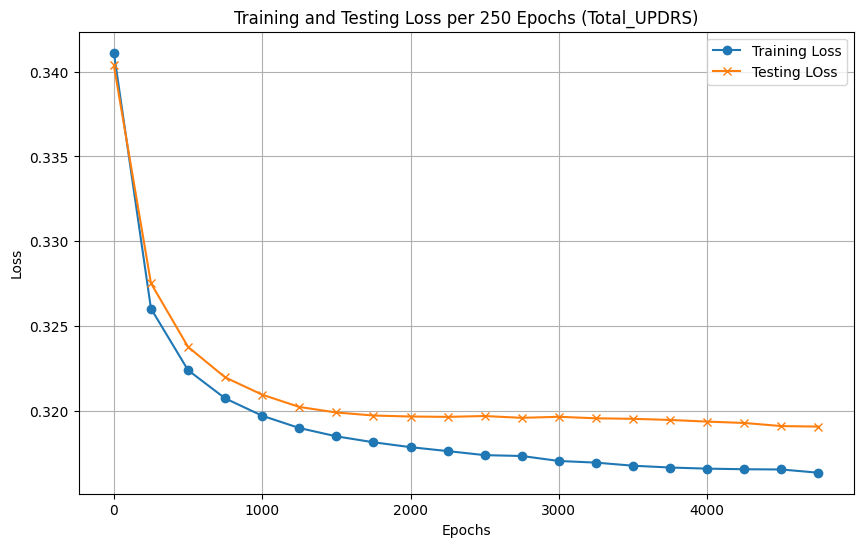

In [11]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(train_loss))], train_loss, label='Training Loss', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(test_loss))], test_loss, label='Testing LOss', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title
plt.title('Training and Testing Loss per 250 Epochs (Total_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Error Plot Motor_UPDRS

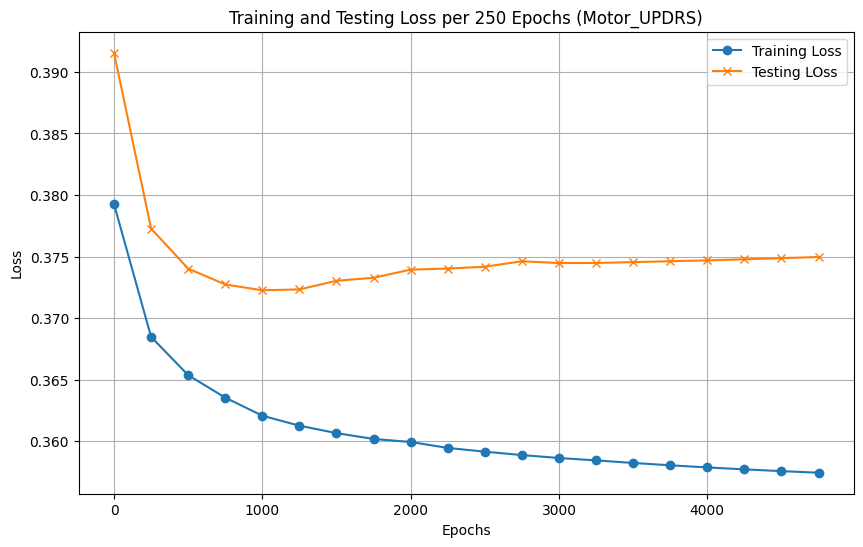

In [13]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(train_loss))], train_loss, label='Training Loss', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(test_loss))], test_loss, label='Testing LOss', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title
plt.title('Training and Testing Loss per 250 Epochs (Motor_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Classification Report

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the test set using the best model
Y1_pred = best_model(X_test_tensor)

# Get the predicted labels
_, predicted_labels = torch.max(Y1_pred, 1)

# Calculate the confusion matrix
cr = classification_report(Y1_test_tensor, predicted_labels)

cm = confusion_matrix(Y1_test_tensor, predicted_labels)

# Print the confusion matrix
print(cr)
print("Confusion Matrix:")
print(cm)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       280
           1       1.00      0.99      1.00       308

    accuracy                           0.99       588
   macro avg       0.99      1.00      0.99       588
weighted avg       0.99      0.99      0.99       588

Confusion Matrix:
[[280   0]
 [  3 305]]


In [25]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report
cr = classification_report(Y1_test_tensor, predicted_labels, output_dict=True)

# Convert to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Save to CSV
cr_df.to_csv('classification_report_Total_UPDRS.csv')

<b>Considering the total_updrs </b>best model has a training loss =  0.3552, Training Accuracy: 0.9580, Testing Accuracy: 0.9371

<b>Considering the total_updrs </b>best model has a training Loss: 0.3140, Training Accuracy: 0.9992, Testing Accuracy: 0.9983

----------------------------------------<h1>Done</h1>----------------------------------------------------------

<h3><b>AUC-ROC Total_UPDRS

AUC ROC: 0.9933441558441558


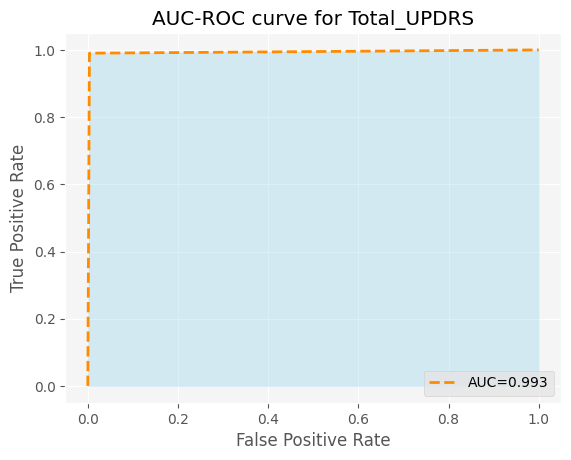

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

# Set plot style
plt.style.use('ggplot')

# Plot ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC={auc_roc:.3f}', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Total_UPDRS')
plt.legend(loc="lower right")
plt.grid(True)

# Add a background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Calculate area under ROC curve (AUC ROC)
print("AUC ROC:", auc_roc)

plt.show()

<h3><b>AUC-ROC Motor_UPDRS

AUC ROC: 0.9386363636363636


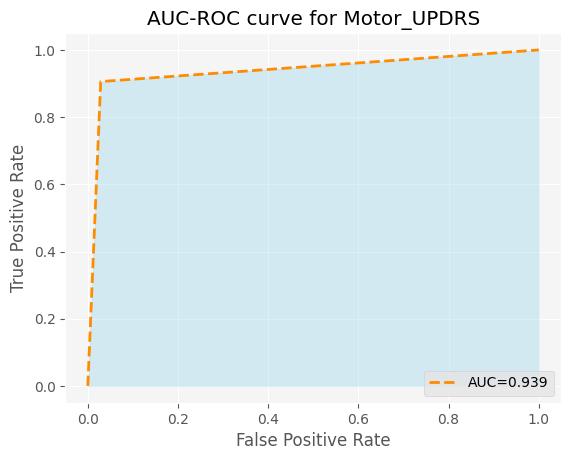

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

# Set plot style
plt.style.use('ggplot')

# Plot ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC={auc_roc:.3f}', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Motor_UPDRS')
plt.legend(loc="lower right")
plt.grid(True)

# Add a background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Calculate area under ROC curve (AUC ROC)
print("AUC ROC:", auc_roc)

plt.show()

<h3><b>AUC-PR Total_UPDRS

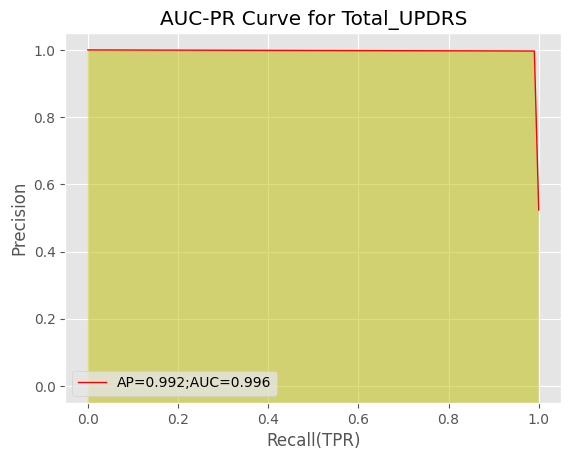

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve, average_precision_score,auc
precision,recall,thresholds=precision_recall_curve(Y1_test_tensor, predicted_labels)
avg_precision=average_precision_score(Y1_test_tensor, predicted_labels)
pr_auc=auc(recall,precision)
plt.figure(dpi=100)
plt.plot(recall,precision,lw=1,color='red',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
plt.title('AUC-PR Curve for Total_UPDRS')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

<h3><b>AUC-PR Motor_UPDRS

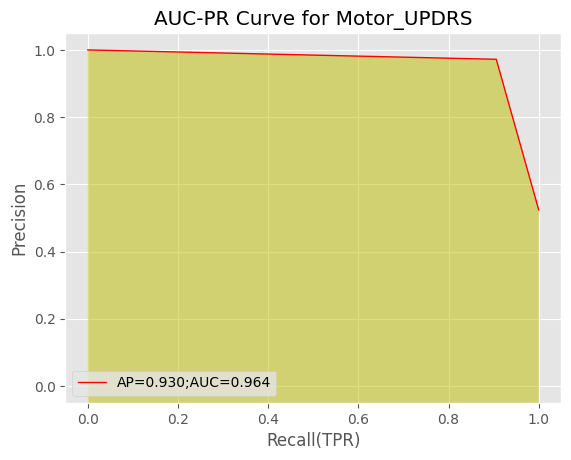

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve, average_precision_score,auc
precision,recall,thresholds=precision_recall_curve(Y1_test_tensor, predicted_labels)
avg_precision=average_precision_score(Y1_test_tensor, predicted_labels)
pr_auc=auc(recall,precision)
plt.figure(dpi=100)
plt.plot(recall,precision,lw=1,color='red',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
plt.title('AUC-PR Curve for Motor_UPDRS')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()